# BioDendro Quick Start Example

The BioDendro pipeline automates the process of binning and hierarchically clustering
msms components and spectra.

This notebook shows basic use of the pipeline for the:
- [Python API](#Python-API)
- [Command line API](#Command-line-API)

\* API = Application programming interface

## Python API

The python interface allows you to make small changes easily and view intermediate results.
A more detailed explanation of the Python API/pipeline is available in the `longer_example.ipynb` notebook at the BioDendro repository.

In [1]:
# Load modules

import os
import plotly
import BioDendro

The main `pipeline` function runs the full pipeline (i.e. reading files, clustering, and plotting).
At a minimum the function needs an MGF file and a component list.
Note that by default, the results will be saved to a folder in your current working directory using the name `results_<datetime>` where datetime will be the date and current time of day in `hhmmss` format.
This is to avoid overwriting data in multiple runs.

To get a list of possible parameters and defaults you can run `help(BioDendro.pipeline)`.

In [2]:
help(BioDendro.pipeline)

Help on function pipeline in module BioDendro:

pipeline(mgf_path, components_path, neutral=False, cutoff=0.6, bin_threshold=0.0008, clustering_method='jaccard', processed='processed.xlsx', results_dir=None, out_html='simple_dendrogram.html', width=900, height=1200, quiet=False, scaling=False, filtering=False, eps=0.6, mz_tol=0.002, retention_tol=5, **kwargs)
    Runs the BioDendro pipeline.
    
    BioDentro takes an MGF and a list of components, finds MSMS spectra
    matching your components, and writes out useful summaries of clusters
    based on shared ion spectra
    
    Minimal example:
    >>> tree = BioDendro.pipeline("MSMS.mgf", "component_list.txt")
    
    Required parameters:
    mgf_path           Name of .mgf file
    components_path    Name of .txt file
    
    Optional parameters:
    parameter          description
                       default value
                       user options
    
    neutral            convert MSMS spectra to neutral loss spectra
     

In [12]:
# Run the complete BioDendro pipeline

tree = BioDendro.pipeline("Fireflies_MSMS.mgf", "Fireflies_component_list.txt", clustering_method="braycurtis", scaling=True, filtering=True, eps=0.002, width=1200, height=1000)

Running BioDendro v0.0.1

- input mgf file = Fireflies_MSMS.mgf
- input components file = Fireflies_component_list.txt
- neutral = False
- cutoff = 0.6
- bin_threshold = 0.0008
- clustering_method = braycurtis
- output processed file = results_20190426124514\processed.xlsx
- output results directory = results_20190426124514
- output html dendrogram = results_20190426124514\simple_dendrogram.html
- dendrogram figure width = 1200
- dendrogram figure height = 1000
- scaling = True
- filtering = True
- eps = 0.002
- mz_tolerance = 0.002
- retention_tolerance = 5


Processing inputs
Binning and clustering
This may take some time...
Writing per-cluster summaries
Writing output html dendrogram
Finished


The pipeline function prints out running information for you, including the directory where you can find your results.
Note that the dendrograms and processed files are also saved into this directory, even if you don't specify that in the filename.

The pipeline also returns a `Tree` object, which stores most of the results.
We can change the number clusters by specifying a new distance threshold.

In [13]:
# Show the number of clusters before adjustment
print("BEFORE: Cutoff:", tree.cutoff, "n clusters:", len(set(tree.clusters)))

# Re-set a new cutoff for clusters
tree.cut_tree(cutoff=0.8)

# Show number of clusters after adjustment
print("AFTER: Cutoff:", tree.cutoff, "n clusters:", len(set(tree.clusters)))

BEFORE: Cutoff: 0.6 n clusters: 271
AFTER: Cutoff: 0.8 n clusters: 168


So our cluster results are updated to use a higher threshold (i.e. fewer clusters, with more members).
Note that these updated results are not automatically saved to the results folder.

To save these updated results, we need to create a new folder and write the summaries ourselves.
Previously the pipeline function handled this all for us.

NOTE: this will overwrite any contents in the specified directory so be careful!

In [5]:
# Generate the out plots and tables of the new clusters.
# exist_ok tells python not to raise an error if the directory already exists.
os.makedirs("results", exist_ok=True)
tree.write_summaries(path="results")

We can also find a lot of this information in the `Tree` object directly.

A dictionary mapping sample ids to clusters is in the `.cluster_dict` attribute.

In [14]:
tree.cluster_map["Ppyr_hemolymph_extract_533.238464355468_15.101331"]

3

So "Chinese Spring 1_001829_0724_m/z241.1544_RT0.7890" belongs to the returned cluster number!

We can get more information about the cluster using the `cluster_table` method, which returns a pandas dataframe
similar to the ones in the results output folder.

The next cell shows all samples in cluster 1, and all `mz` bins that are present in at least one of the samples.

In [15]:
tree.cluster_table(cluster=3)

bins,1029.4494_1029.4494_1029.4494,1047.4646_1047.4646_1047.4646,1047.4686_1047.4686_1047.4686,105.0701_105.0698_105.0707,107.0492_107.0489_107.0498,107.0860_107.0857_107.0862,1082.4910_1082.4910_1082.4910,117.0703_117.0701_117.0706,119.0859_119.0851_119.0864,121.0649_121.0644_121.0653,...,927.4104_927.4104_927.4104,93.0703_93.0701_93.0708,95.0493_95.0490_95.0501,951.4002_951.4002_951.4002,951.4070_951.4070_951.4070,969.4337_969.4337_969.4337,969.4393_969.4393_969.4393,97.0652_97.0648_97.0659,987.4268_987.4268_987.4268,987.4311_987.4311_987.4311
component,,,,,,,,,,,,,,,,,,,,,
Ppyr_hemolymph_extract_1065.4677734375_15.366083,False,False,False,True,True,False,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49493408203_21.307386,True,False,True,True,True,False,False,False,True,True,...,True,True,True,False,True,False,True,False,False,True
Ppyr_hemolymph_extract_1082.49499511718_15.123002,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49499511718_15.366083,False,False,False,True,False,False,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49523925781_18.945589,False,True,False,True,False,False,True,False,True,True,...,False,False,False,True,False,True,False,False,True,False
Ppyr_hemolymph_extract_1110.52667236328_17.431269,False,False,False,True,True,False,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227569580078_12.962671,False,False,False,True,True,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227676391601_10.204906,False,False,False,True,True,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227783203125_13.224755,False,False,False,True,False,False,False,False,True,True,...,False,True,True,False,False,False,False,False,False,False


The `cluster_table` method also allows you to specify a sample instead of the cluster number.
In this case it will just look up which cluster your sample belongs to and return the corresponding table.

In [9]:
tree.cluster_table(sample="Ppyr_hemolymph_extract_533.238464355468_15.101331")

bins,1029.4494_1029.4494_1029.4494,1047.4646_1047.4646_1047.4646,1047.4686_1047.4686_1047.4686,105.0701_105.0698_105.0707,107.0492_107.0489_107.0498,107.0860_107.0857_107.0862,1076.8733_1076.8733_1076.8733,1082.4910_1082.4910_1082.4910,117.0703_117.0701_117.0706,119.0859_119.0851_119.0864,...,93.0703_93.0701_93.0708,95.0493_95.0490_95.0501,951.4002_951.4002_951.4002,951.4070_951.4070_951.4070,960.8495_960.8495_960.8495,969.4337_969.4337_969.4337,969.4393_969.4393_969.4393,97.0652_97.0648_97.0659,987.4268_987.4268_987.4268,987.4311_987.4311_987.4311
component,,,,,,,,,,,,,,,,,,,,,
Ppyr_hemolymph_extract_1065.4677734375_15.366083,False,False,False,True,True,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49493408203_21.307386,True,False,True,True,True,False,False,False,False,True,...,True,True,False,True,False,False,True,False,False,True
Ppyr_hemolymph_extract_1082.49499511718_15.123002,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49499511718_15.366083,False,False,False,True,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_1082.49523925781_18.945589,False,True,False,True,False,False,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
Ppyr_hemolymph_extract_1110.52667236328_17.431269,False,False,False,True,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227569580078_12.962671,False,False,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227676391601_10.204906,False,False,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
Ppyr_hemolymph_extract_491.227783203125_13.224755,False,False,False,True,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False


We can also directly view the cluster mz bin frequencies using the `cluster_hist` method.

First we enable the `%matplotlib inline` mode.
This just tells [matplotlib](https://matplotlib.org/) (the plotting library) to show the results directly in the notebook.

In [16]:
%matplotlib inline

Then we can plot the histogram for a cluster by specifying the cluster or sample as for `cluster_table`.

TIP: to hide the returned tuple (<Figure...>, <...axes...>), just add a semicolon to the end of the line after the method call.

(<Figure size 2815.2x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xfef0b00>)

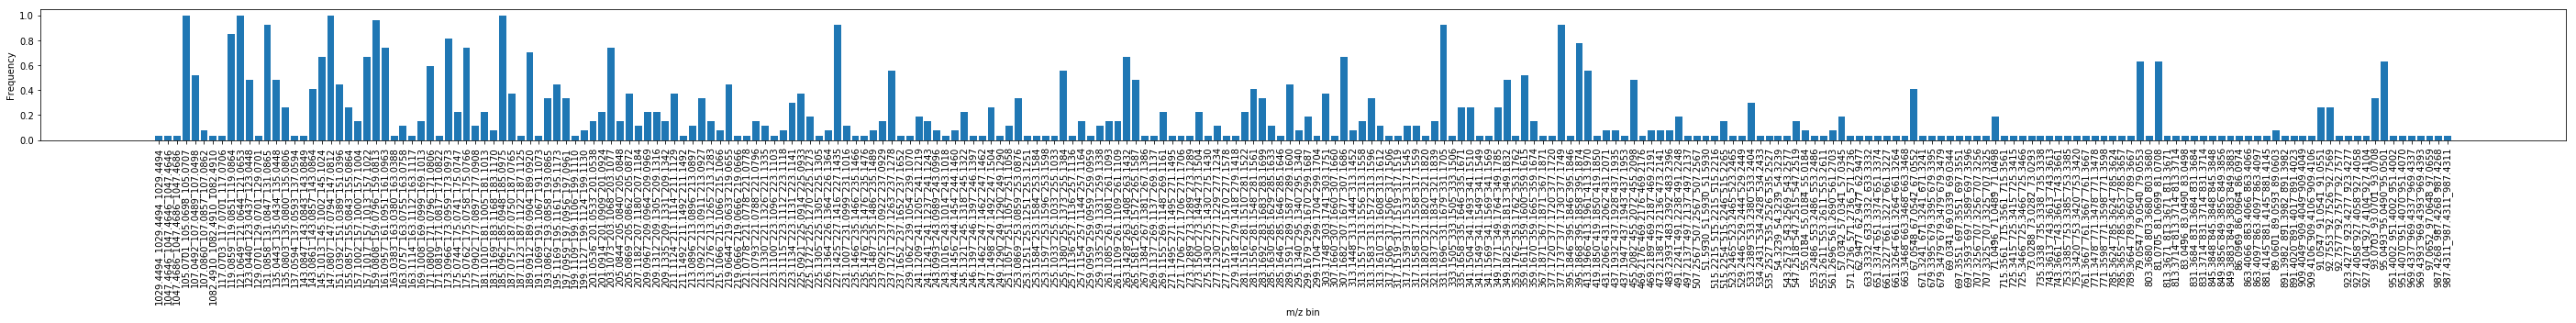

In [17]:
tree.cluster_hist(cluster=3)

We can view the interactive tree directly in an IPython notebook using the plotly `notebook_mode`.

In [18]:
# View the new dendrogram cutoff inline

plotly.offline.init_notebook_mode(connected=True) # for visualising plot inline
iplot = tree.plot(width=1200, height=1000)
plotly.offline.iplot(iplot)

## Command line API

The pipeline can also be run from a bash or bash-like terminal.
This is useful if you're not planning on tweaking the parameters much and just want to run the darn thing.

For these examples, we're using the ipython magic command `%%bash` to run the commands in bash.
You can omit the %%bash bit if you're running straight in the terminal.

To get a list of all options available use the `--help` (or `-h`) flag.

In [12]:
%%bash
BioDendro --help

usage: BioDendro [-h] [-n] [-c CUTOFF] [-b BIN_THRESHOLD]
                 [-d {jaccard,braycurtis}] [-p PROCESSED] [-o OUT_HTML]
                 [-r RESULTS_DIR] [-x WIDTH_PX] [-y HEIGHT_PX] [-s] [-f]
                 [-e EPS] [-mz_tol MZ_TOL] [-retention_tol RETENTION_TOL] [-q]
                 mgf components

BioDentro takes an MGF and a list of components, finds MSMS spectra matching
your components, and writes out useful summaries of clusters based on shared
ion spectra.

positional arguments:
  mgf                   MGF input file.
  components            Listed components file.

optional arguments:
  -h, --help            show this help message and exit
  -n, --neutral         Convert MSMS spectra to neutral loss spectra.
  -c CUTOFF, --cutoff CUTOFF
                        The y-axis value to cut the dendogram and form
                        clusters. Must be between 0 and 1 (Default 0.6).
  -b BIN_THRESHOLD, --bin-threshold BIN_THRESHOLD
                        Maximum diffe

The minimum options to run the pipeline are the MGF file and a components list.

Using the example data in the BioDendro repo we could run...

In [13]:
%%bash

BioDendro MSMS.mgf component_list.txt

Running BioDendro v0.0.1

- input mgf file = MSMS.mgf
- input components file = component_list.txt
- neutral = False
- cutoff = 0.6
- bin_threshold = 0.0008
- clustering_method = jaccard
- output processed file = results_20190424172221/processed.xlsx
- output results directory = results_20190424172221
- output html dendrogram = results_20190424172221/simple_dendrogram.html
- dendrogram figure width = 900
- dendrogram figure height = 1200
- scaling = False
- filtering = False
- eps = 0.6
- mz_tolerance = 0.002
- retention_tolerance = 5


Processing inputs
Binning and clustering
This may take some time...
Writing per-cluster summaries
Writing output html dendrogram
Finished


As before, the results will be stored in a directory with the current date and the current time added to the end of it.

You can change the parameters to use by supplying additional flags, however, this will run the whole pipeline again, so it you just need to adjust the cutoff or decide to use braycurtis instead of jaccard distances, you might be better off using the python API.

In [14]:
%%bash

BioDendro --scaling --cluster-method braycurtis --cutoff 0.5 MSMS.mgf component_list.txt

Running BioDendro v0.0.1

- input mgf file = MSMS.mgf
- input components file = component_list.txt
- neutral = False
- cutoff = 0.5
- bin_threshold = 0.0008
- clustering_method = braycurtis
- output processed file = results_20190424172342/processed.xlsx
- output results directory = results_20190424172342
- output html dendrogram = results_20190424172342/simple_dendrogram.html
- dendrogram figure width = 900
- dendrogram figure height = 1200
- scaling = True
- filtering = False
- eps = 0.6
- mz_tolerance = 0.002
- retention_tolerance = 5


Processing inputs
Binning and clustering
This may take some time...
Writing per-cluster summaries
Writing output html dendrogram
Finished


would be equivalent to running the following in python

In [15]:
tree = BioDendro.pipeline("MSMS.mgf", "component_list.txt", clustering_method="braycurtis", scaling=True, cutoff=0.5)

Running BioDendro v0.0.1

- input mgf file = MSMS.mgf
- input components file = component_list.txt
- neutral = False
- cutoff = 0.5
- bin_threshold = 0.0008
- clustering_method = braycurtis
- output processed file = results_20190424172451/processed.xlsx
- output results directory = results_20190424172451
- output html dendrogram = results_20190424172451/simple_dendrogram.html
- dendrogram figure width = 900
- dendrogram figure height = 1200
- scaling = True
- filtering = False
- eps = 0.6
- mz_tolerance = 0.002
- retention_tolerance = 5


Processing inputs
Binning and clustering
This may take some time...
Writing per-cluster summaries
Writing output html dendrogram
Finished
